In [372]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [374]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [29]:
import os
import random
from sklearn.model_selection import train_test_split

In [129]:
original_train_dir = 'C:\\Users\\Ioana\\Documents\\PetImages'

In [320]:
from PIL import Image
import numpy as np
import os

def resize_and_normalize(image_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        # If the image is grayscale, convert it to RGB (3 channels)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img_resized = img.resize(target_size)
        img_array = np.array(img_resized)
        
        # Normalize the image
        img_normalized = img_array / 255.0
        return img_normalized

# List to store the resized and normalized images
all_images = []

# Loop through all files and apply the resize and normalization
for image_path in all_files:
    all_images.append(resize_and_normalize(image_path))

# Convert the list of images to a numpy array after processing all images
all_images = np.array(all_images)

# Check the shape of all_images
print(f"Shape of all_images: {all_images.shape}")

# Split the dataset into train, validation, and test sets
train_files, temp_files, train_labels, temp_labels = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
val_files, test_files, val_labels, test_labels = train_test_split(temp_files, temp_labels, test_size=2/3, random_state=42)

print(f"Train images shape: {train_files.shape}")
print(f"Validation images shape: {val_files.shape}")
print(f"Test images shape: {test_files.shape}")


Shape of all_images: (24998, 224, 224, 3)
Train images shape: (17498, 224, 224, 3)
Validation images shape: (2500, 224, 224, 3)
Test images shape: (5000, 224, 224, 3)


In [364]:
train_files = train_files.astype('float32')/255.0


In [366]:
test_files=test_files.astype('float32')/255.0
val_files=val_files.astype('float32')/255.0

In [368]:
print(test_files.shape)  # Should show (num_samples, 224, 224, 3)
print(test_files.dtype)  # Should be 'float32'


(5000, 224, 224, 3)
float32


In [380]:

# Model definition
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_files, np.array(train_labels), 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(val_files, np.array(val_labels)))


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 253s 459ms/step - accuracy: 0.5061 - loss: 0.7188 - val_accuracy: 0.5336 - val_loss: 0.6857
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 241s 441ms/step - accuracy: 0.5857 - loss: 0.6721 - val_accuracy: 0.6748 - val_loss: 0.5990
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 243s 444ms/step - accuracy: 0.7132 - loss: 0.5584 - val_accuracy: 0.7824 - val_loss: 0.4730
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 242s 442ms/step - accuracy: 0.8012 - loss: 0.4361 - val_accuracy: 0.7904 - val_loss: 0.4381
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 241s 440ms/step - accuracy: 0.8491 - loss: 0.3411 - val_accuracy: 0.8584 - val_loss: 0.3153
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 242s 442ms/step - accuracy: 0.8898 - loss: 0.2562 - val_accuracy: 0.8756 - val_loss: 0.2872
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 240s 439ms/step - accuracy: 0.9235 - loss: 0.1863 - val_accuracy: 0.8884 - val_loss: 0.3019
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 235s 430ms/step - accuracy: 0.9485 -

In [384]:
# Save the trained model to a file
model.save('cats_and_dogs_model.keras')


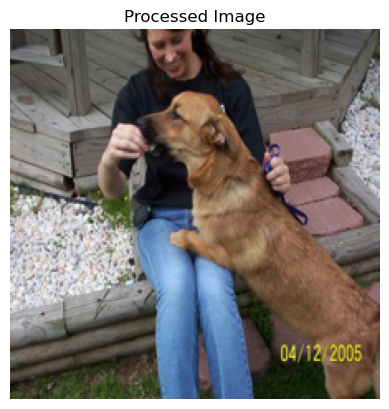

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This is a Dog.


In [412]:

def preprocess_image(image_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        # If the image is grayscale, convert it to RGB (3 channels)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img_resized = img.resize(target_size)
        img_array = np.array(img_resized)
        
        # Normalize the image
        img_normalized = img_array / 255.0
        # Visualize the processed image
        plt.imshow(img_normalized)
        plt.title("Processed Image")
        plt.axis('off')  # Hide axes
        plt.show()

        return img_normalized

def predict_image(image_path):
    # Preprocess the uploaded image
    processed_image = preprocess_image(image_path)
    
    # Expand dimensions to match the input shape of the model (batch size of 1)
    processed_image = np.expand_dims(processed_image, axis=0)
    
    # Make the prediction
    prediction = model.predict(processed_image)
    
    # Convert the prediction to class label
    if prediction[0] > 0.5:
        print("This is a Dog.")
    else:
        print("This is a Cat.")

# Test the function with an uploaded image
image_path = 'C:\\Users\\Ioana\\Documents\\PetImages\\Dog\\52.jpg'  # Replace with the actual path of the uploaded image
predict_image(image_path)